# previous

binary 만 기존에는 사용했었다. 하지만 이제는 multi-class 를 사용할 것이다. 

이렇게 되면 code 가 어떤 식으로 DNN 에서 이뤄지는지에 대해서 알게 될 것이라고 한다. 

이미지가 다양하게 필요하다. asian, black, white.... 그래서 우리는 CGI 를 이용한 이미지를 사용하게 될 것이라고 한다. 

이것도 충분히 잘 된다고 하니... 걱정안해도 될 것이라고 생각이 된다. 

multiple class 로 이제는 trianing 을 진행할 것이라고 한다. 이번에도 전과동일하게, training 에서 묵,찌,빠 에 대한 이미지를 처리하게 될것이고, 

validation 에서도 묵,찌, 빠 에 대해서 directory 를 설정해서 진행 할 것이라고 한다. 

# about Dataset

rock paper scissor 데이터에는 2,892 개의 이미지로 구성되어있다. 
다양한 인종, 나이, 성별 이 묵,찌,빠 를 하고 있는 이미지들을 처리하게 될 것이다. 

CGI 를 이요한 데이터이다. 

각 이미지는 300x300 이고, 24-bit color 으로 구성이 되어있다. 

training_set, validation_set, test_set 으로 구성이 되어있다. 




# class_mode ='categorical'

class_mode 는 이제 categorical 로 진행을 할 예정이다. 전에는 그냥 binary 로 했었음을 기억하자. 

# layer.dense(1, activation = 'sigmoid') 을 더이상 사용할 수 없다는 것을 인지 해야된다. 이제는 layer.dense(3, activatino = 'softmax') 를 사용할 예정이다.

#### sigmoid 는 확율 적인 것을 나타내며, 확률적으로 제일 높은 것을 선택하게 하는 것이다. 

#### model.compile(loss ) 도 이제는 다른 것을 사용하게 될 것이다. 

training, validation 을 두개 다 얻을 것이다. 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-07-22 15:06:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: `/tmp/rps.zip'

/tmp/rps.zip        100%[===================>] 191.38M  46.1MB/s    in 4.3s    

2021-07-22 15:06:37 (44.9 MB/s) - `/tmp/rps.zip' saved [200682221/200682221]

--2021-07-22 15:06:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 34.64.4.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: `/tmp/rps-test-set.zip'

/tmp/rps-

In [9]:
import os 
import zipfile
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')
print('total training rock images : ', len(os.listdir(rock_dir)))
print('total training paper images : ', len(os.listdir(paper_dir)))
print('total training scissors images : ', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])



('total training rock images : ', 840)
('total training paper images : ', 840)
('total training scissors images : ', 840)
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png']
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png']
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


/tmp/rps/rock/rock04-059.png


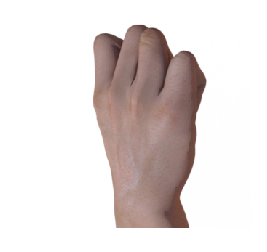

/tmp/rps/rock/rock01-108.png


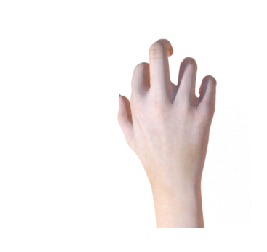

/tmp/rps/rock/rock04-065.png


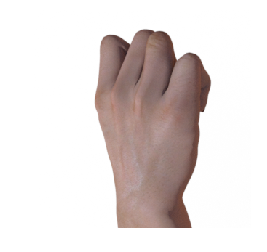

/tmp/rps/rock/rock05ck01-067.png


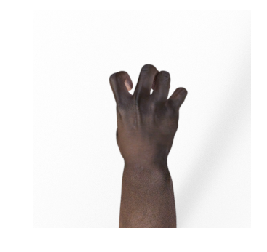

/tmp/rps/rock/rock05ck01-073.png


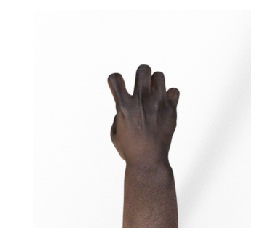

/tmp/rps/paper/paper03-077.png


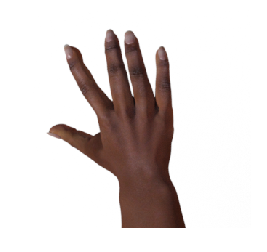

/tmp/rps/paper/paper03-063.png


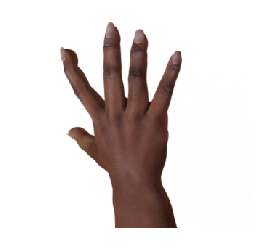

/tmp/rps/scissors/testscissors03-083.png


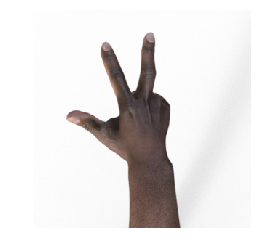

/tmp/rps/scissors/testscissors03-097.png


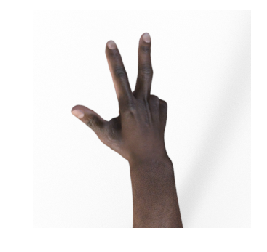

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_rock = [os.path.join(rock_dir, fname)
            for fname in rock_files[pic_index-5:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
             for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    
    

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

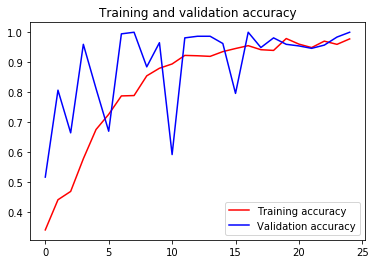

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

/Users/hhi/opt/anaconda3/envs/python27/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`